In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Activation,Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print("Train: x=%s,y=%s" %(x_train.shape,y_train.shape))
print("Test: x=%s,y=%s" %(x_test.shape,y_test.shape))

Train: x=(60000, 28, 28),y=(60000,)
Test: x=(10000, 28, 28),y=(10000,)


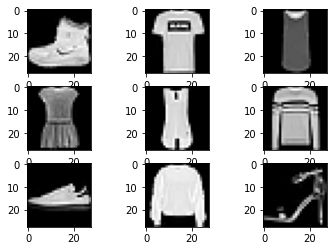

In [4]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [6]:
x_train=x_train.astype("float")
x_test=x_test.astype("float")

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
train_y_encoder=to_categorical(y_train)
test_y_encoder=to_categorical(y_test)

In [16]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=((28,28,1))))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(x_train,train_y_encoder,batch_size=64,epochs=5)

Epoch 1/5
938/938 [==============================] - 107s 114ms/step - loss: 0.6061 - accuracy: 0.7819
Epoch 2/5
938/938 [==============================] - 113s 120ms/step - loss: 0.4106 - accuracy: 0.8506
Epoch 3/5
938/938 [==============================] - 126s 134ms/step - loss: 0.3653 - accuracy: 0.8682
Epoch 4/5
938/938 [==============================] - 135s 144ms/step - loss: 0.3380 - accuracy: 0.8767
Epoch 5/5
938/938 [==============================] - 140s 149ms/step - loss: 0.3169 - accuracy: 0.8852


In [19]:
test_loss,test_acc=model.evaluate(x_test,test_y_encoder)
print("Test loss=",test_loss)
print("Test_accuracy=",test_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.3388 - accuracy: 0.8774
Test loss= 0.3388301134109497
Test_accuracy= 0.8773999810218811


In [21]:
predictions=model.predict(x_test)
print(np.argmax(np.round(predictions[1])))

2


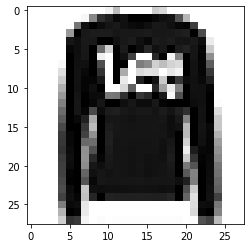

In [22]:
plt.imshow(x_test[1].reshape(28,28),cmap=plt.cm.binary)
plt.show()